<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/DecisionTree%26RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [4]:
import pandas as pd

In [5]:
credit_df = pd.read_csv("German Credit Data.csv")
credit_df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [7]:
credit_df.status.value_counts()

0    700
1    300
Name: status, dtype: int64

In [8]:
X_features = list(credit_df.columns)
X_features.remove('status')
print(X_features)

['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc', 'present_emp_since', 'inst_rate', 'personal_status', 'residing_since', 'age', 'inst_plans', 'num_credits', 'job']


In [9]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first=True)

In [10]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [11]:
X = encoded_credit_df
y = credit_df.status

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
modelDT = DecisionTreeClassifier(criterion="gini", max_depth = 3)

In [16]:
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

**Measuring Test Accuracy**

In [17]:
y_pred = modelDT.predict(X_test)

In [18]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred)

0.5835743204164258

**Displaying the Tree**

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt

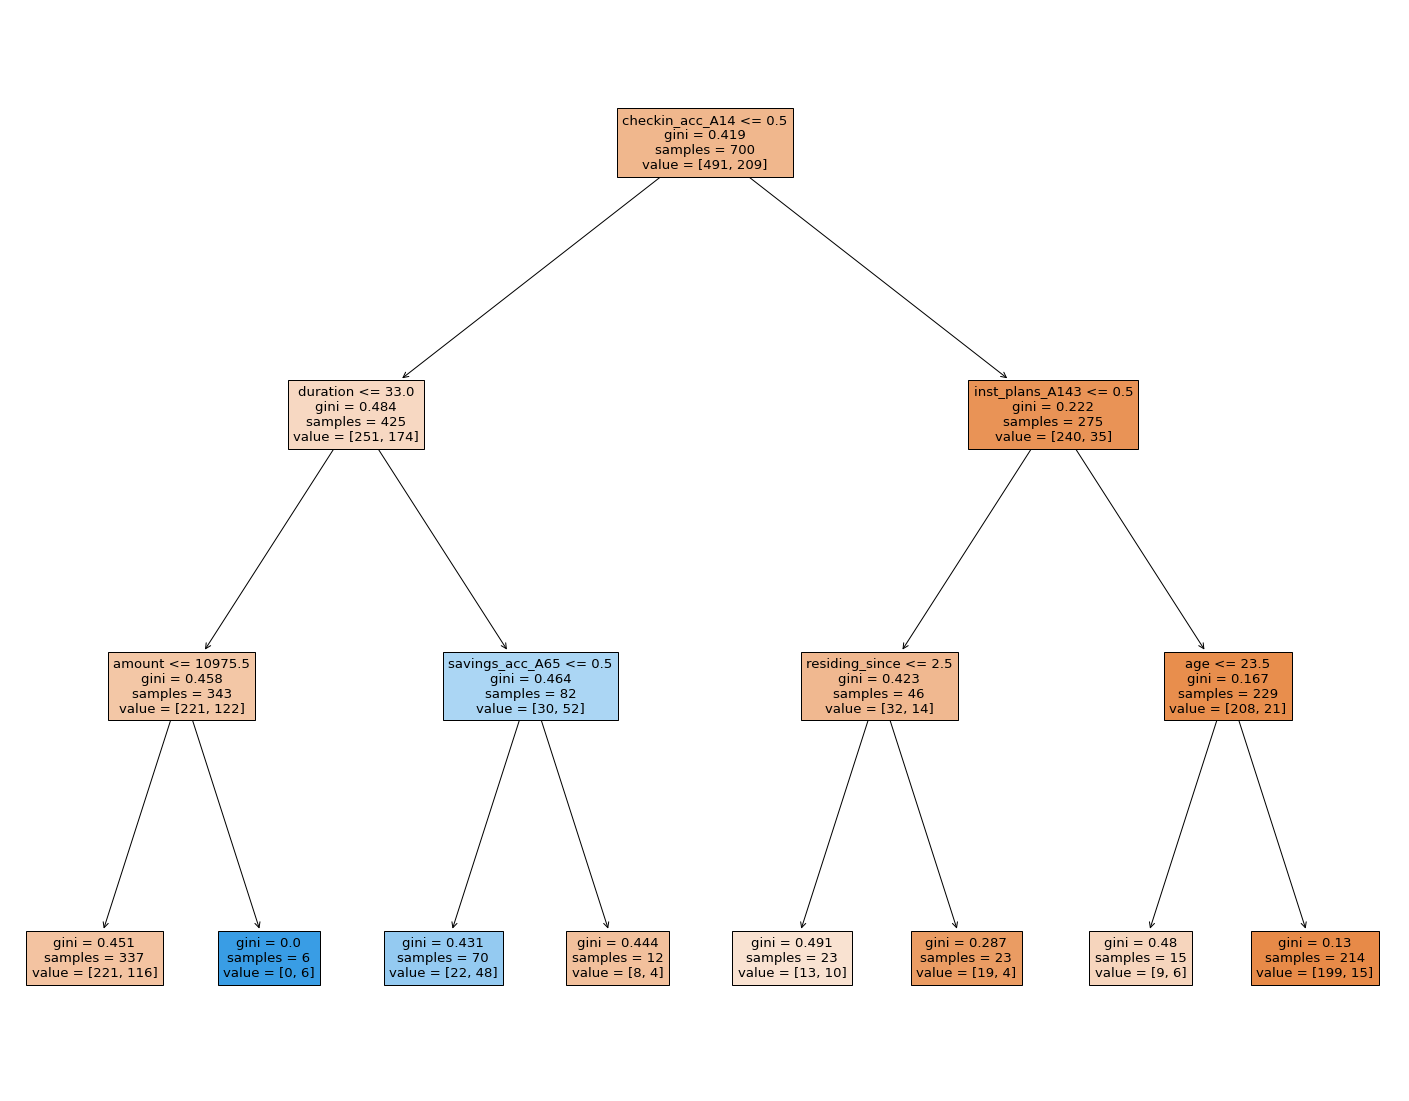

In [20]:
fig = plt.figure(figsize=(25,20))

tree.plot_tree(modelDT, feature_names=X_train.columns, filled=True)
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param = [{'criterion':['gini','entropy'], 'max_depth':range(2,10)}]
model = DecisionTreeClassifier()
modelCV = GridSearchCV(model, param, cv=10, scoring="roc_auc")
modelCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [23]:
modelCV.best_score_

0.6830090864917396

In [24]:
modelCV.best_params_

{'criterion': 'gini', 'max_depth': 4}

**Performance Measure**

In [25]:
pred_y = modelCV.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
confusion_matrix(y_test, pred_y)

array([[186,  23],
       [ 68,  23]])

In [28]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       209
           1       0.50      0.25      0.34        91

    accuracy                           0.70       300
   macro avg       0.62      0.57      0.57       300
weighted avg       0.66      0.70      0.66       300



In [29]:
auc = metrics.roc_auc_score(y_test, modelCV.predict_proba(X_test)[:,1])

# Random Forest (Ensemble Methods)

Ensemble Method
+ All the models discussed so far predict the value of the outcome variable based on a single model.
+ **Ensemble methods:** Learning algorithms that take a set of models and classify new data points using strategy such as majority vote.
+ The majority voting could be based on counting simply the vote from each class or it could be weighted based on their individual accuracy measures.

Sampling for Ensemble methods
+ Bootstrap sampling

+ Different decision trees will be trained using bootstraped samples and collectively individuals decision tree will be clubbed and The final clubbed model is known as Random Forest.

Bagging
+ The process of bootstrapping samples from original set to build multiple models and aggreagitn their results for final prediction is known as ***Bagging***.

+ The term 'bagging' comes from bootstarpping plus aggreagting. One of the most widely used bagging technique is ***Random Forest***.

Random Forest
+ A ***Random Forest*** is an ensemble of decision trees where each decision tree is built from bootstrap samples.
+ Hyperparameters are No. of decision trees, no. of records and features to be sampled and Depth and Search criteria(Gini impurity index or entropy).
+ Optimal length of decision tree should be log2(Features).

Boosting (Improvement over Bagging)
+ It is another popular ensemble technique which combines multiple weak classifiers into a single strong classifier. 
+ A weak classifier is one which is slightly better than random guessing.
+ That is, error is less than 50%.
+ Any classification algorithm can be used for boosting and is called base classifier.
+ Boosting builds multiple classifiers in a sequential manner as opposed to baggin, which can be build classifiers in parallel.
+ Boosting builds initial classifier by giving equal weights to each sample and then focuses on correctly classifying misclassified examples in subsequent classifiers.
+ Two most widely used boosting algorithms are AdaBoost and Gradient Boosting.
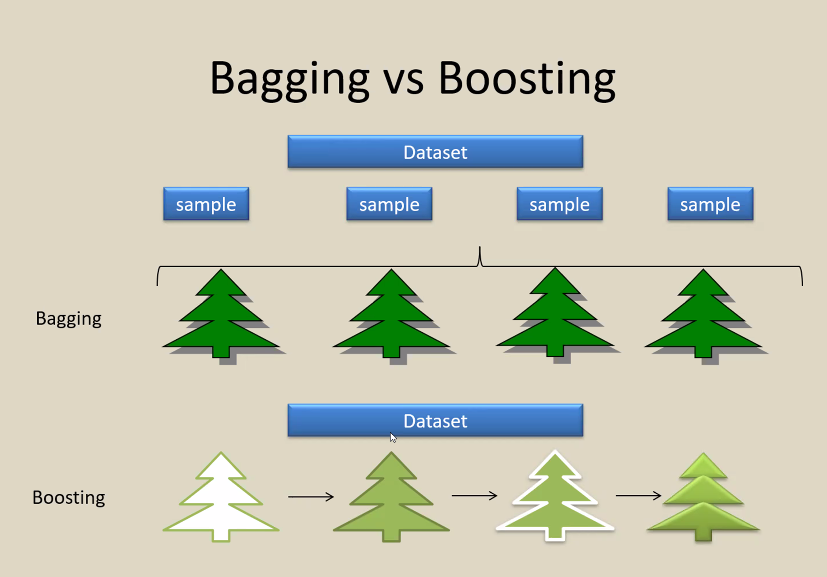



ADABOOST::
+ Adaboost assigns weight to each record in a training set, which determines the probability that a specific record is selected for tranining a classifier.
+ For the first classifier, the weights of all example will be equal.
+ After training the first classifier, AdaBoost increases the weight for the misclassified records.
+ This is done so that these records will have a higher prbability of selection in the training set.
+ The next classifier will learn to classify them correctly.
+ In one form of boosting called AdaBoost, we iteratively train a series of weak models (most often a shallow decision tree, sometimes called a stump).

Gradient Boosting:
+ AdaBoost focuses on the misclassified examples in subsequent classifiers, whereas Gradient Boosting focusses on residuals from previous classifiers and fits a model to the residuals.
+ Gradient boosting algorithm repetitively leverages the patterns in residuals and strengthens the model with weak predictions and makes it better.
+ Once it reaches a stage in which residuals do not have any pattern that could be molded, it stops modelling residuals.



OOB(Out-of-bag) [To test the accuracy]
+ In random forest, each decision tree is trained using a bootstrapped subset of observations.
+ This means that for every tree there is a separate subset of observations not begin used to train that tree.
+ These are called out-of-bag(OOB) observations. 
+ OOB score estimation is an alternative to cross validation.
+ The accuracy score is calculated and provides a single measure of a random forest's performance.

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
modelRF = RandomForestClassifier(max_depth=5, n_estimators=100)
modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [32]:
auc = metrics.roc_auc_score(y_test, modelRF.predict_proba(X_test)[:,1])
auc

0.7760660392239339

**Grid Search**

In [33]:
params = [{'max_depth':[5,10,15], 'n_estimators':[5,10,20], 'max_features':['sqrt',0.2, 0.3, 0.5]}]
modelRF = RandomForestClassifier()
modelCV = GridSearchCV(modelRF, params,cv=10,scoring='roc_auc')
modelCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'max_features': ['sqrt', 0.2, 0.3, 0.5],
                          'n_estimators': [5, 10, 20]}],
             scoring='roc_auc')

max_features = 
+ 'sqrt' is the default paramter
+ 0.2 is the 20% of the total no. of features
+ 0.3 is the 30% of the total no. of featurs

In [34]:
modelCV.best_score_

0.7523313896987368

In [35]:
modelCV.best_params_

{'max_depth': 5, 'max_features': 0.2, 'n_estimators': 20}

**Building the model with the best params**

In [36]:
model_bp = RandomForestClassifier(max_depth=5, n_estimators=20, max_features=0.3)

In [37]:
model_bp.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.3, n_estimators=20)

In [38]:
metrics.roc_auc_score(y_test, model_bp.predict_proba(X_test)[:,1])

0.7681791892318208

In [55]:
#oob_score out of the box

**Performance metrics**

In [40]:
pred_y = model_bp.predict(X_test)

In [41]:
#confusion matrix

In [42]:
#classification report

**Drawing the ROC curve**

In [43]:
import matplotlib.pyplot as plt

In [44]:
fpr,tpr,thresholds = metrics.roc_curve(y_test, model_bp.predict_proba(X_test)[:,1])

In [45]:
roc_auc = metrics.auc(fpr,tpr)

In [46]:
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='RF')

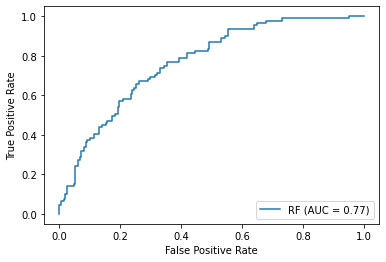

In [47]:
display.plot()
plt.show()

**Feature Importance**

In [48]:
import numpy as np
import seaborn as sns

In [49]:
feature_rank = pd.DataFrame({'feature':X_train.columns, 'importance':model_bp.feature_importances_})

In [50]:
feature_rank.head()

,feature,importance
0,duration,0.110903
1,amount,0.171703
2,inst_rate,0.027329
3,residing_since,0.022578
4,age,0.102387


In [51]:
feature_rank.sort_values('importance', ascending=True, inplace=True)

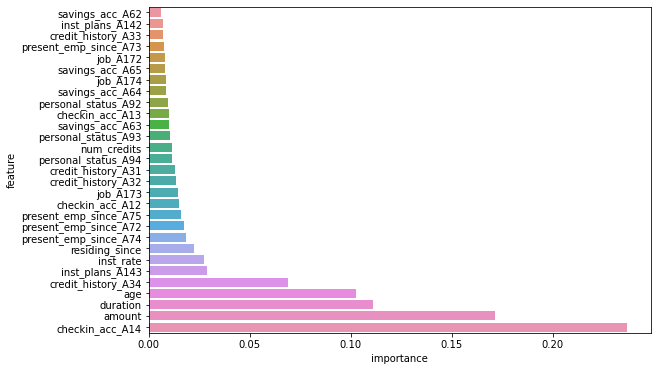

In [52]:
plt.figure(figsize=(9,6))
sns.barplot(y='feature', x='importance', data=feature_rank)
plt.show()

In [53]:
feature_rank['cumsum'] = feature_rank['importance'].cumsum()*100

In [54]:
feature_rank.head()

,feature,importance,cumsum
13,savings_acc_A62,0.006191,0.619079
24,inst_plans_A142,0.006810,1.300042
11,credit_history_A33,0.006955,1.995516
18,present_emp_since_A73,0.007693,2.764801
26,job_A172,0.007791,3.543923
